# Naive Bayes Classifier - Multinomial Naive Bayes

# Bank Marketing Dataset 
- More info of data can be found: https://www.kaggle.com/janiobachmann/bank-marketing-dataset
- age: customer's age
- job: customer's job 
- marital: customer's married state
- education: customer's education level
- default: whether a customer fails to pay the debt or not
- balance: the amount of money a customer stores in a bank account
- housing: whether a customer has purchased a house or not
- loan: whether a customer has borrowed money from the bank
- contact: contact bank has related to the customer (i.e., cellular/unknown/telephone)
- campaign: which campaign a customer has joined

In [1]:
# Import libararies for data management
import numpy as np
import pandas as pd

In [2]:
# Load dataset
data = pd.read_csv('bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   campaign   11162 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 872.2+ KB


In [5]:
data.shape

(11162, 10)

# Data Pre-processing

In [6]:
datanew = pd.get_dummies(data, columns=['job', 'marital', 'education', 'housing', 'loan', 'default'])
datanew.head()

,age,balance,contact,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,59,2343,unknown,1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1,56,45,unknown,1,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,41,1270,unknown,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
3,55,2476,unknown,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
4,54,184,unknown,2,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [7]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  11162 non-null  int64 
 1   balance              11162 non-null  int64 
 2   contact              11162 non-null  object
 3   campaign             11162 non-null  int64 
 4   job_admin.           11162 non-null  uint8 
 5   job_blue-collar      11162 non-null  uint8 
 6   job_entrepreneur     11162 non-null  uint8 
 7   job_housemaid        11162 non-null  uint8 
 8   job_management       11162 non-null  uint8 
 9   job_retired          11162 non-null  uint8 
 10  job_self-employed    11162 non-null  uint8 
 11  job_services         11162 non-null  uint8 
 12  job_student          11162 non-null  uint8 
 13  job_technician       11162 non-null  uint8 
 14  job_unemployed       11162 non-null  uint8 
 15  job_unknown          11162 non-null  uint8 
 16  mari

In [8]:
datanew.columns

Index(['age', 'balance', 'contact', 'campaign', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'default_no', 'default_yes'],
      dtype='object')

In [9]:
# define features 
features = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management',
            'job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed',
            'marital_divorced', 'marital_married', 
            'education_primary', 'education_secondary','education_tertiary',
            'housing_yes','loan_yes']
X = datanew[features]
X

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,housing_yes,loan_yes
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11158,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
11159,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
11160,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1


In [10]:
# define target
y = datanew['default_yes']

In [11]:
y.value_counts()

0    10994
1      168
Name: default_yes, dtype: int64

In [12]:
# ! pip install imblearn scikit-learn==1.1.0

In [13]:
# ! pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
# transform the datas into balanced data
oversample = SMOTE(random_state=123)
X_new, y_new = oversample.fit_resample(X, y)

In [16]:
y_new.value_counts()

1    10994
0    10994
Name: default_yes, dtype: int64

In [17]:
# import multinomial naive bayes model from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

from sklearn.naive_bayes import MultinomialNB

In [18]:
# define a multinomial bayes classifier
# alpha:smoothing parameter, by default=1.0
mnb = MultinomialNB()

In [19]:
# import cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

In [20]:
#predict target based on cross validation
y_pred_cv = cross_val_predict(mnb,X_new,y_new,cv=5)
y_pred_cv

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [21]:
Accuracy = cross_val_score(mnb,X_new,y_new,cv=5).mean()
Accuracy

0.6490366276647138

# ROC Curve

In [22]:
# probablities for each prediction
proba_y = cross_val_predict(mnb, X_new, y_new, cv=5, method='predict_proba')

In [23]:
proba_y

array([[9.56439087e-001, 4.35609128e-002],
       [9.62985589e-001, 3.70144112e-002],
       [9.74279795e-001, 2.57202054e-002],
       ...,
       [9.64169405e-001, 3.58305953e-002],
       [8.83936579e-001, 1.16063421e-001],
       [1.41556554e-138, 1.00000000e+000]])

In [24]:
# get the column of probabilities being 1
proba_y_1 = proba_y[:,1]

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
# get fpr, tpr and thresholds

fpr, tpr, thresholds = metrics.roc_curve(y_new, proba_y_1, pos_label=1)

In [26]:
# help(roc_curve)

In [27]:
tpr

array([0.        , 0.29388758, 0.29479716, ..., 0.99154084, 0.99172276,
       1.        ])

In [28]:
fpr

array([0., 0., 0., ..., 1., 1., 1.])

In [29]:
thresholds

array([2.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
       1.03311916e-123, 1.02820258e-123, 2.42146973e-227])

In [30]:
# plot roc curve
import matplotlib as mpl
import matplotlib.pyplot as plt

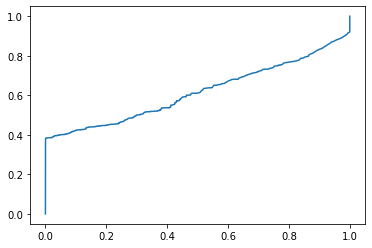

In [31]:
plt.plot(fpr,tpr)
plt.show()

In [32]:
# auc (area under ROC curve)
metrics.auc(fpr, tpr)

0.6158158059257288